Let's try to determine the critical temperature of the 2D Ising ferromagnet by looking at the intersection point of the Binder cumulants for different system sizes. 

The simulation should take around several minutes on a single core if numba is properly installed. Sit back and relax.

In [19]:
import importlib

import numpy as np
from matplotlib import pyplot as plt

import spin_models
importlib.reload(spin_models)
from spin_models import Ising

lattice_shapes = [(10, 10), (20, 20)]  # specify the lattice shapes we need
temperatures = np.geomspace(0.1, 10, 30)  # specify the temperatures for simulation
isings = [Ising(shape, couplings='bimodal', temperatures=temperatures) for shape in lattice_shapes]   # initialize the Ising instances

for ising in isings:
    ising.sample(2**14, cluster_update_interval=2**3, pt_interval=1)
    # ising.sample(2**14, cluster_update_interval=2**3, pt_interval=1)

sampling with cluster_update_interval=8 and pt_interval=1: 100%|██████████| 16384/16384 [00:30<00:00, 534.62it/s]
sampling with cluster_update_interval=8 and pt_interval=1: 100%|██████████| 16384/16384 [00:53<00:00, 305.01it/s]


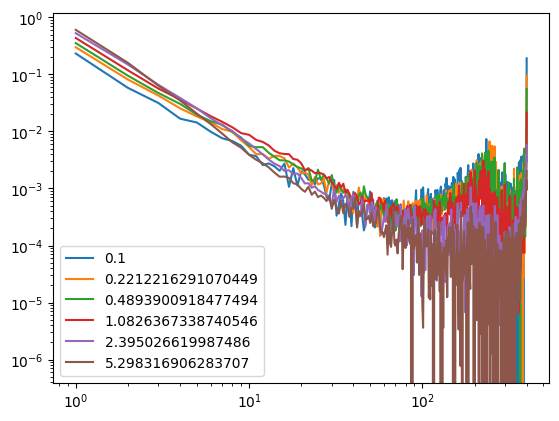

In [4]:
from matplotlib import pyplot as plt

csds = isings[1].csds_stat.average[::5]

plt.plot(np.arange(1, 401), csds.T)
plt.xscale('log')
plt.yscale('log')
plt.legend(temperatures[::5])
plt.show()

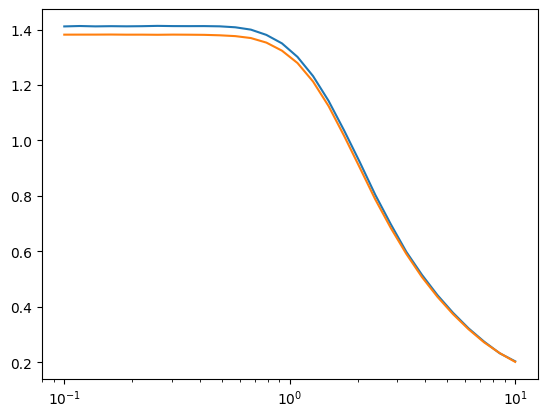

In [20]:
from matplotlib import pyplot as plt

binder_cumulants = np.vstack([ising.energies_stat.average for ising in isings]).T

plt.plot(temperatures, binder_cumulants)
plt.xscale('log')
plt.show()